In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('The_Processed_data.csv');
print(df)

<ipython-input-2-0823e708fc68>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


      Unnamed: 0  Patient ID   Age  Sex   Cholesterol  Systolic BP  \
0              0         241     1    1             0     0.755556   
1              1         455     2    1             1     0.833333   
2              2         247     2    0             1     0.933333   
3              3        1468     1    1             1     0.811111   
4              4         972     1    1             1     0.011111   
...          ...         ...   ...  ...           ...          ...   
3995        3995        3099     1    1             0     0.911111   
3996        3996        2881     0    0             2     0.211111   
3997        3997         400     1    1             2     0.700000   
3998        3998         623     1    1             1     0.211111   
3999        3999        3387     0    0             2     0.111111   

      Diastolic BP   Heart Rate  Diabetes  Family History  Smoking  Diet  \
0             0.56     0.457143         0               0        1     0   
1      

In [3]:
fn= df.keys().tolist()[:-1]
X= df[fn]
y=df["Heart Attack Risk"]
print(X)

      Unnamed: 0  Patient ID   Age  Sex   Cholesterol  Systolic BP  \
0              0         241     1    1             0     0.755556   
1              1         455     2    1             1     0.833333   
2              2         247     2    0             1     0.933333   
3              3        1468     1    1             1     0.811111   
4              4         972     1    1             1     0.011111   
...          ...         ...   ...  ...           ...          ...   
3995        3995        3099     1    1             0     0.911111   
3996        3996        2881     0    0             2     0.211111   
3997        3997         400     1    1             2     0.700000   
3998        3998         623     1    1             1     0.211111   
3999        3999        3387     0    0             2     0.111111   

      Diastolic BP   Heart Rate  Diabetes  Family History  Smoking  Diet  \
0             0.56     0.457143         0               0        1     0   
1      

In [4]:
#GINI Index 
# Splitting Data into 70% Training and 30% Test
#The model is trained using the Gini index, and the dataset is split into 70% training and 30% testing subsets.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Create decision tree classifer object:
clf_gini = DecisionTreeClassifier(criterion='gini')

#Train decision tree classifer
clf_gini = clf_gini.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_gini = clf_gini.predict(X_test)

In [6]:
#confusion matrix 

[[363 263]
 [305 269]]


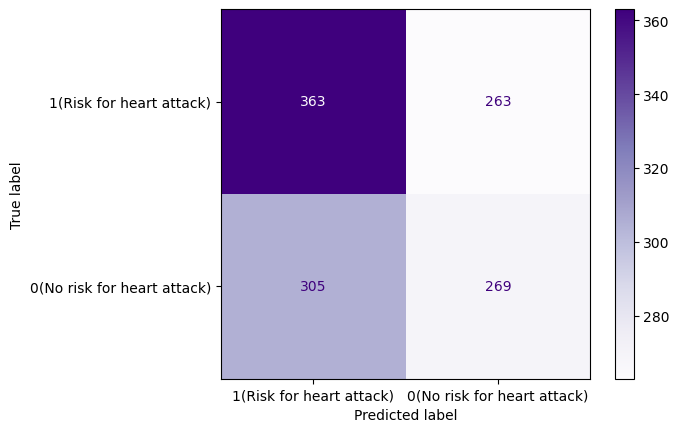

In [9]:
# Compute and print the confusion matrix
cm_gini = confusion_matrix(y_test, y_pred_gini)
print(cm_gini)

class_labels = {1: '1(Risk for heart attack)', 0: '0(No risk for heart attack)'}
disp_gini = ConfusionMatrixDisplay(confusion_matrix=cm_gini, display_labels=[class_labels[1], class_labels[0]])

disp_gini.plot(cmap=plt.cm.Purples)
plt.show()

In [77]:
'''
The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:
- Top-left cell (363):Represents the number of true positives (TP). This indicates that 363 instances with a risk of heart attack were correctly identified as being at risk.

- Top-right cell (263):Represents the number of false negatives (FN). This means that 263 instances that actually have a risk of heart attack were incorrectly classified as not having a risk.

- Bottom-left cell (305): Represents the number of false positives (FP). This shows that 305 instances without a risk of heart attack were incorrectly predicted as being at risk.

- Bottom-right cell (269):Represents the number of true negatives (TN). This means that 269 instances without a risk of heart attack were correctly identified as not being at risk.
'''

'\nThe confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:\n- Top-left cell (363):Represents the number of true positives (TP). This indicates that 363 instances with a risk of heart attack were correctly identified as being at risk.\n\n- Top-right cell (263):Represents the number of false negatives (FN). This means that 263 instances that actually have a risk of heart attack were incorrectly classified as not having a risk.\n\n- Bottom-left cell (305): Represents the number of false positives (FP). This shows that 305 instances without a risk of heart attack were incorrectly predicted as being at risk.\n\n- Bottom-right cell (269):Represents the number of true negatives (TN). This means that 269 instances without a risk of heart attack were correctly identified as not be

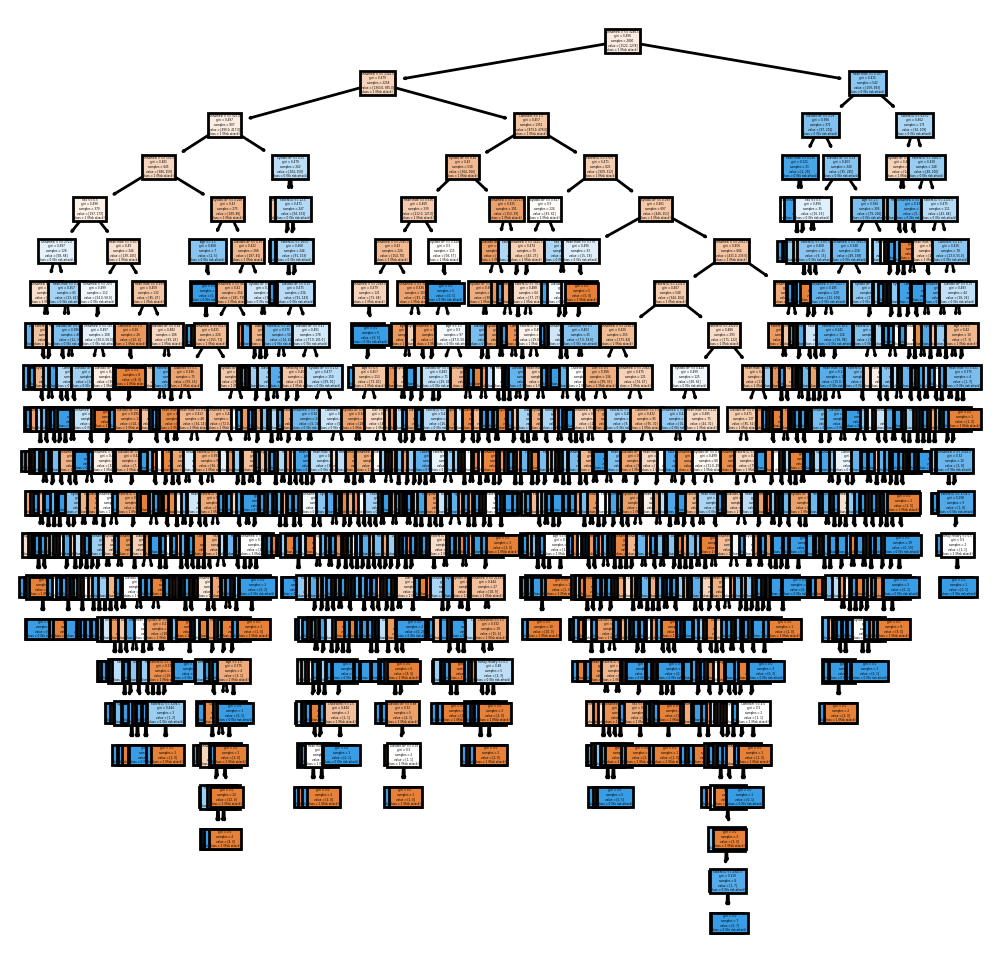

In [23]:
#Decision Tree 

# Plot the decision tree for Gini index
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=200)

class_labels = {1: '1 (Risk attack)', 0: '0 (No risk attack)'}

tree.plot_tree(clf_gini,
               feature_names=fn,
               class_names=[class_labels[1], class_labels[0]], 
               filled=True
               )

plt.show()

In [74]:
'''
This code is used to plot a decision tree for a classifier that has been trained using the Gini index as the criterion.
First, it sets up a plot with a figure size of 6x6 inches and a high resolution of 200 DPI.
The `class_labels` dictionary maps class values `1` and `0` to their descriptive labels: `1` corresponds to "Risk attack" and `0` corresponds to "No risk attack."
These labels are then used to display meaningful class names in the decision tree plot.
 The resulting plot allows one to see how the decision tree classifies input data and makes decisions based on the Gini index criterion,Each internal node represents a decision point based on a feature, while the leaf nodes indicate the final classification: whether there is a risk (1) or no risk (0) of heart attack.
 '''

'\nThis code is used to plot a decision tree for a classifier that has been trained using the Gini index as the criterion.\nFirst, it sets up a plot with a figure size of 6x6 inches and a high resolution of 200 DPI.\nThe `class_labels` dictionary maps class values `1` and `0` to their descriptive labels: `1` corresponds to "Risk attack" and `0` corresponds to "No risk attack."\nThese labels are then used to display meaningful class names in the decision tree plot.\n The resulting plot allows one to see how the decision tree classifies input data and makes decisions based on the Gini index criterion,Each internal node represents a decision point based on a feature, while the leaf nodes indicate the final classification: whether there is a risk (1) or no risk (0) of heart attack.\n '

In [12]:

# Compute Accuracy
accuracy_gini = metrics.accuracy_score(y_test, y_pred_gini)
print("Accuracy:", accuracy_gini)

# Error Rate
error_rate_gini = 1 - accuracy_gini
print("Error Rate:", error_rate_gini)

# Sensitivity (Recall) and Specificity require TN, FP, FN, TP:
TP = cm_gini[1, 1]
TN = cm_gini[0, 0]
FP = cm_gini[0, 1]
FN = cm_gini[1, 0]

# Sensitivity (Recall)
sensitivity_gini = TP / (TP + FN)
print("Sensitivity:", sensitivity_gini)

# Specificity
specificity_gini = TN / (TN + FP)
print("Specificity:", specificity_gini)

# Precision
precision_gini = TP / (TP + FP)
print("Precision:", precision_gini)


Accuracy: 0.5266666666666666
Error Rate: 0.4733333333333334
Sensitivity: 0.4686411149825784
Specificity: 0.5798722044728435
Precision: 0.5056390977443609


In [76]:
'''
The results presented are metrics used to evaluate the performance of a classification model. 
1-Accuracy (0.5267):This represents the proportion of correct predictions (both true positives and true negatives) out of all predictions made by the model. In this case, the model correctly predicted the class about 52.67% of the time, which indicates that its overall performance is slightly better than random guessing, but it's not very high.

2-Error Rate (0.4733):The error rate is the complement of accuracy, representing the proportion of incorrect predictions made by the model. In this case, the model made errors in about 47.33% of the predictions. This value is high, suggesting the model may not be performing very well.

3-Sensitivity (0.4686):also known as recall or true positive rate, measures the model's ability to correctly identify positive cases (1, "risk attack"), a sensitivity of 46.86% means that the model correctly identified approximately 47% of the actual positive cases, but it failed to identify more than half of the actual positives.

4-Specificity (0.5799):also known as the true negative rate, measures the model's ability to correctly identify negative cases (0, "No risk attack"). A specificity of 57.99% means the model correctly identified about 58% of the cases where there was no risk of an attack. This shows that the model is slightly better at identifying negative cases than positive ones.

5-Precision (0.5056):measures how many of the positive predictions made by the model are actually correct. With a precision of 50.56%, the model's positive predictions are only about half correct. This suggests the model may have a significant number of false positives (incorrectly labeling non-risk cases as risk).

Overall, the model has moderate performance but struggles with identifying positive cases and has a high error rate.
'''

'\nThe results presented are metrics used to evaluate the performance of a classification model. \n1-Accuracy (0.5267):This represents the proportion of correct predictions (both true positives and true negatives) out of all predictions made by the model. In this case, the model correctly predicted the class about 52.67% of the time, which indicates that its overall performance is slightly better than random guessing, but it\'s not very high.\n\n2-Error Rate (0.4733):The error rate is the complement of accuracy, representing the proportion of incorrect predictions made by the model. In this case, the model made errors in about 47.33% of the predictions. This value is high, suggesting the model may not be performing very well.\n\n3-Sensitivity (0.4686):also known as recall or true positive rate, measures the model\'s ability to correctly identify positive cases (1, "risk attack"), a sensitivity of 46.86% means that the model correctly identified approximately 47% of the actual positive 

In [13]:
#Splitting Data into: 60% Training and 40% Test:
#The model is trained using the Gini index, and the dataset is split into 60% training and 40% testing subsets.

In [41]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.4, random_state=1)

#Create decision tree classifer object:
clf_gini2 = DecisionTreeClassifier(criterion='gini')

#Train decision tree classifer
clf_gini2 = clf_gini2.fit(X_train1, y_train1)

#Predict the response for test dataset
y_pred_gini2 = clf_gini2.predict(X_test1)

In [15]:
#Confusion Matrix

[[494 354]
 [358 394]]


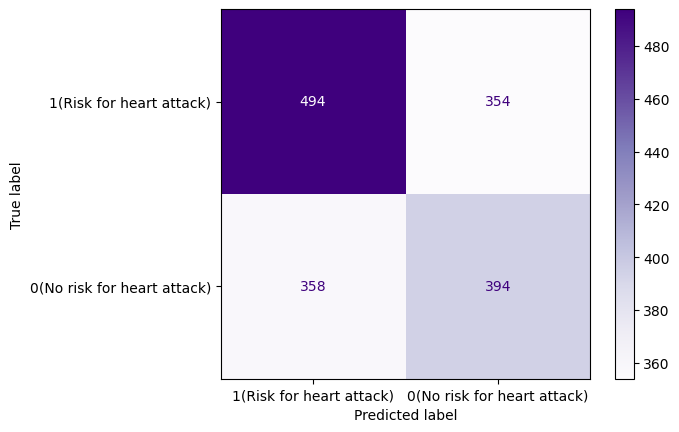

In [50]:
# Compute and print the confusion matrix
cm_gini2= confusion_matrix(y_test1, y_pred_gini2)
print(cm_gini)

class_labels = {1: '1(Risk for heart attack)', 0: '0(No risk for heart attack)'}
disp_gini = ConfusionMatrixDisplay(confusion_matrix=cm_gini2, display_labels=[class_labels[1], class_labels[0]])

disp_gini.plot(cmap=plt.cm.Purples)
plt.show()

In [78]:
'''
The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification:

- Top-left cell (494):Represents the number of true positives (TP). This indicates that 494 instances with a risk of heart attack were correctly identified as being at risk.

- Top-right cell (354):Represents the number of false negatives (FN). This means that 354 instances that actually have a risk of heart attack were incorrectly classified as not having a risk.

- Bottom-left cell (358): Represents the number of false positives (FP). This shows that 358 instances without a risk of heart attack were incorrectly predicted as being at risk.

- Bottom-right cell (394):Represents the number of true negatives (TN). This means that 394 instances without a risk of heart attack were correctly identified as not being at risk.
'''

'\nThe confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification:\n\n- Top-left cell (494):Represents the number of true positives (TP). This indicates that 494 instances with a risk of heart attack were correctly identified as being at risk.\n\n- Top-right cell (354):Represents the number of false negatives (FN). This means that 354 instances that actually have a risk of heart attack were incorrectly classified as not having a risk.\n\n- Bottom-left cell (358): Represents the number of false positives (FP). This shows that 358 instances without a risk of heart attack were incorrectly predicted as being at risk.\n\n- Bottom-right cell (394):Represents the number of true negatives (TN). This means that 394 instances without a risk of heart attack were correctly identified as not being at risk.\n'

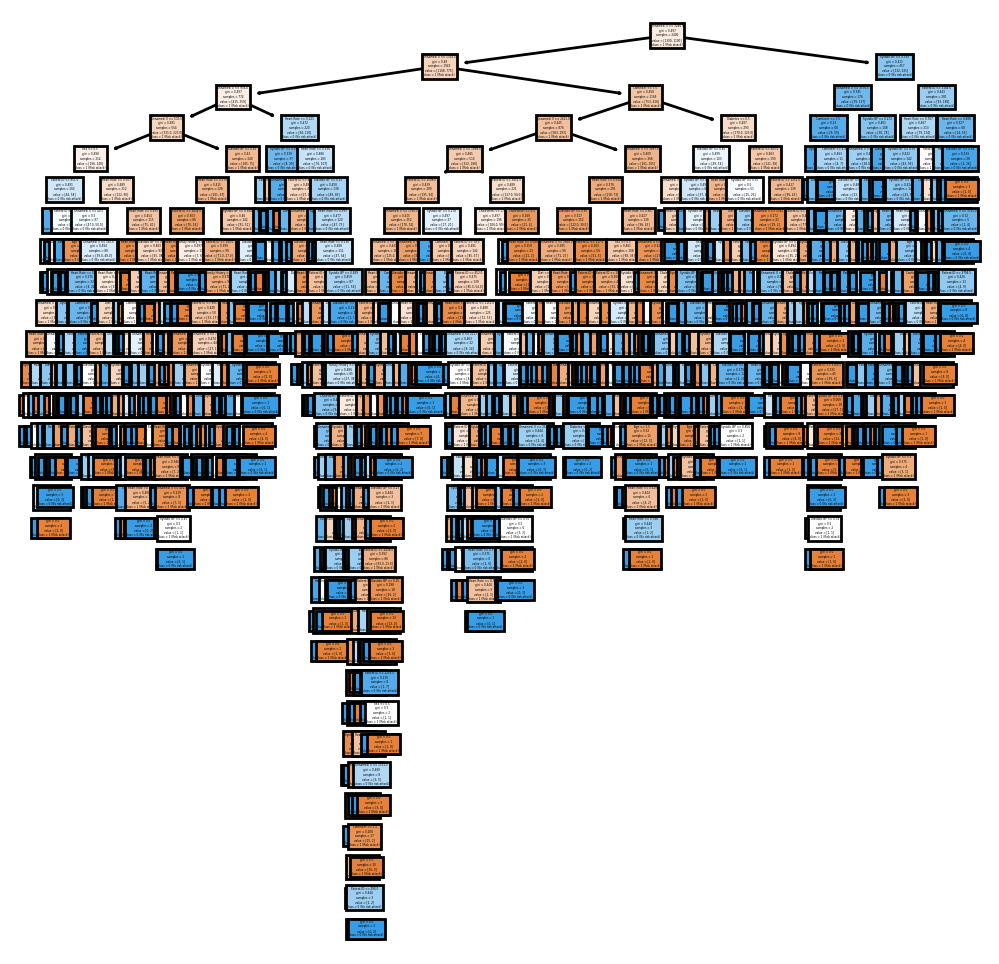

In [51]:
#Decision Tree 

# Plot the decision tree for Gini index
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=200)

class_labels = {1: '1 (Risk attack)', 0: '0 (No risk attack)'}

tree.plot_tree(clf_gini2,
               feature_names=fn,
               class_names=[class_labels[1], class_labels[0]], 
               filled=True
               )

plt.show()

In [79]:
'''
A decision tree is a model used for classification or regression that splits data into subsets based on feature values, creating a tree-like structure.
In this code, a decision tree is plotted for a classifier trained using the Gini index as the splitting criterion. The `class_labels` dictionary maps the class values `1` and `0` to descriptive labels: `1` stands for "Risk attack" and `0` stands for "No risk attack."
These labels are used to show meaningful class names in the tree. The plot visualizes how the decision tree classifies input data, with each internal node representing a decision based on a feature, and the leaf nodes showing the final classification—either a risk or no risk of a heart attack.
'''

'\nA decision tree is a model used for classification or regression that splits data into subsets based on feature values, creating a tree-like structure.\nIn this code, a decision tree is plotted for a classifier trained using the Gini index as the splitting criterion. The `class_labels` dictionary maps the class values `1` and `0` to descriptive labels: `1` stands for "Risk attack" and `0` stands for "No risk attack."\nThese labels are used to show meaningful class names in the tree. The plot visualizes how the decision tree classifies input data, with each internal node representing a decision based on a feature, and the leaf nodes showing the final classification—either a risk or no risk of a heart attack.\n'

In [52]:
# Compute Accuracy
accuracy_gini = metrics.accuracy_score(y_test1, y_pred_gini2)
print("Accuracy:", accuracy_gini)

# Error Rate
error_rate_gini = 1 - accuracy_gini
print("Error Rate:", error_rate_gini)

# Sensitivity (Recall) and Specificity require TN, FP, FN, TP:
TP = cm_gini2[1, 1]
TN = cm_gini2[0, 0]
FP = cm_gini2[0, 1]
FN = cm_gini2[1, 0]

# Sensitivity (Recall)
sensitivity_gini = TP / (TP + FN)
print("Sensitivity:", sensitivity_gini)

# Specificity
specificity_gini = TN / (TN + FP)
print("Specificity:", specificity_gini)

# Precision
precision_gini = TP / (TP + FP)
print("Precision:", precision_gini)


Accuracy: 0.555
Error Rate: 0.44499999999999995
Sensitivity: 0.523936170212766
Specificity: 0.5825471698113207
Precision: 0.5267379679144385


In [80]:
'''
These results provide key performance metrics for a classification model:

1-Accuracy (0.555): The model correctly predicted the outcome 55.5% of the time. This is a moderate level of accuracy, suggesting the model performs slightly better than random guessing.
  
2-Error Rate (0.445):The error rate is the complement of accuracy and represents the proportion of incorrect predictions. Here, 44.5% of the predictions were wrong, indicating the model makes errors almost as often as it gets predictions right.

3-Sensitivity (0.5239): Also known as recall or true positive rate, it measures how well the model identifies positive cases. A sensitivity of 52.39% means the model correctly identifies just over half of the actual positive cases, but it misses nearly half of them.

4-Specificity (0.5825):or true negative rate, measures the model’s ability to correctly identify negative cases. A specificity of 58.25% means the model successfully identifies about 58% of the true negative cases.

5-Precision (0.5267): Precision measures how many of the predicted positive cases are actually correct. With a precision of 52.67%, the model's positive predictions are slightly more than half correct, meaning it also makes a significant number of false positives.

Overall Interpretation:
The model shows moderate performance with an accuracy of 55.5%, indicating it has room for improvement. While its ability to identify negative cases is better than its ability to identify positive cases, 
both the sensitivity and precision are around 50%, suggesting the model struggles with balancing correct positive predictions while avoiding false positives. 
The error rate of 44.5% also indicates a significant number of misclassifications.
'''

"\nThese results provide key performance metrics for a classification model:\n\n1-Accuracy (0.555): The model correctly predicted the outcome 55.5% of the time. This is a moderate level of accuracy, suggesting the model performs slightly better than random guessing.\n  \n2-Error Rate (0.445):The error rate is the complement of accuracy and represents the proportion of incorrect predictions. Here, 44.5% of the predictions were wrong, indicating the model makes errors almost as often as it gets predictions right.\n\n3-Sensitivity (0.5239): Also known as recall or true positive rate, it measures how well the model identifies positive cases. A sensitivity of 52.39% means the model correctly identifies just over half of the actual positive cases, but it misses nearly half of them.\n\n4-Specificity (0.5825):or true negative rate, measures the model’s ability to correctly identify negative cases. A specificity of 58.25% means the model successfully identifies about 58% of the true negative ca

In [53]:
# Splitting Data into 80% Training and 20% Test
#The model is trained using the Gini index, and the dataset is split into 80% training and 20% testing subsets.

In [54]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=1)

#Create decision tree classifer object:
clf_gini3 = DecisionTreeClassifier(criterion='gini')

#Train decision tree classifer
clf_gini3 = clf_gini3.fit(X_train2, y_train2)

#Predict the response for test dataset
y_pred_gini3 = clf_gini3.predict(X_test2)

In [55]:
#Confusion Matrix

[[238 171]
 [187 204]]


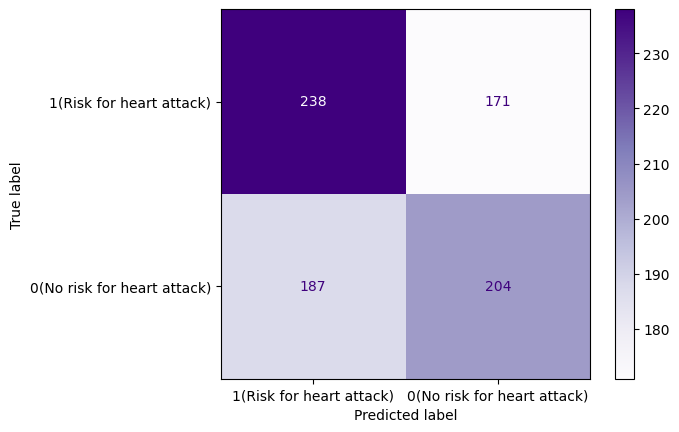

In [56]:
# Compute and print the confusion matrix
cm_gini3 = confusion_matrix(y_test2, y_pred_gini3)
print(cm_gini3)

class_labels = {1: '1(Risk for heart attack)', 0: '0(No risk for heart attack)'}
disp_gini = ConfusionMatrixDisplay(confusion_matrix=cm_gini3, display_labels=[class_labels[1], class_labels[0]])

disp_gini.plot(cmap=plt.cm.Purples)
plt.show()

In [81]:
'''
The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification:

- Top-left cell (238):Represents the number of true positives (TP). This indicates that 238 instances with a risk of heart attack were correctly identified as being at risk.

- Top-right cell (171):Represents the number of false negatives (FN). This means that 171 instances that actually have a risk of heart attack were incorrectly classified as not having a risk.

- Bottom-left cell (187): Represents the number of false positives (FP). This shows that 187 instances without a risk of heart attack were incorrectly predicted as being at risk.

- Bottom-right cell (204):Represents the number of true negatives (TN). This means that 204 instances without a risk of heart attack were correctly identified as not being at risk.
'''

'\nThe confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification:\n\n- Top-left cell (238):Represents the number of true positives (TP). This indicates that 238 instances with a risk of heart attack were correctly identified as being at risk.\n\n- Top-right cell (171):Represents the number of false negatives (FN). This means that 171 instances that actually have a risk of heart attack were incorrectly classified as not having a risk.\n\n- Bottom-left cell (187): Represents the number of false positives (FP). This shows that 187 instances without a risk of heart attack were incorrectly predicted as being at risk.\n\n- Bottom-right cell (204):Represents the number of true negatives (TN). This means that 204 instances without a risk of heart attack were correctly identified as not being at risk.\n'

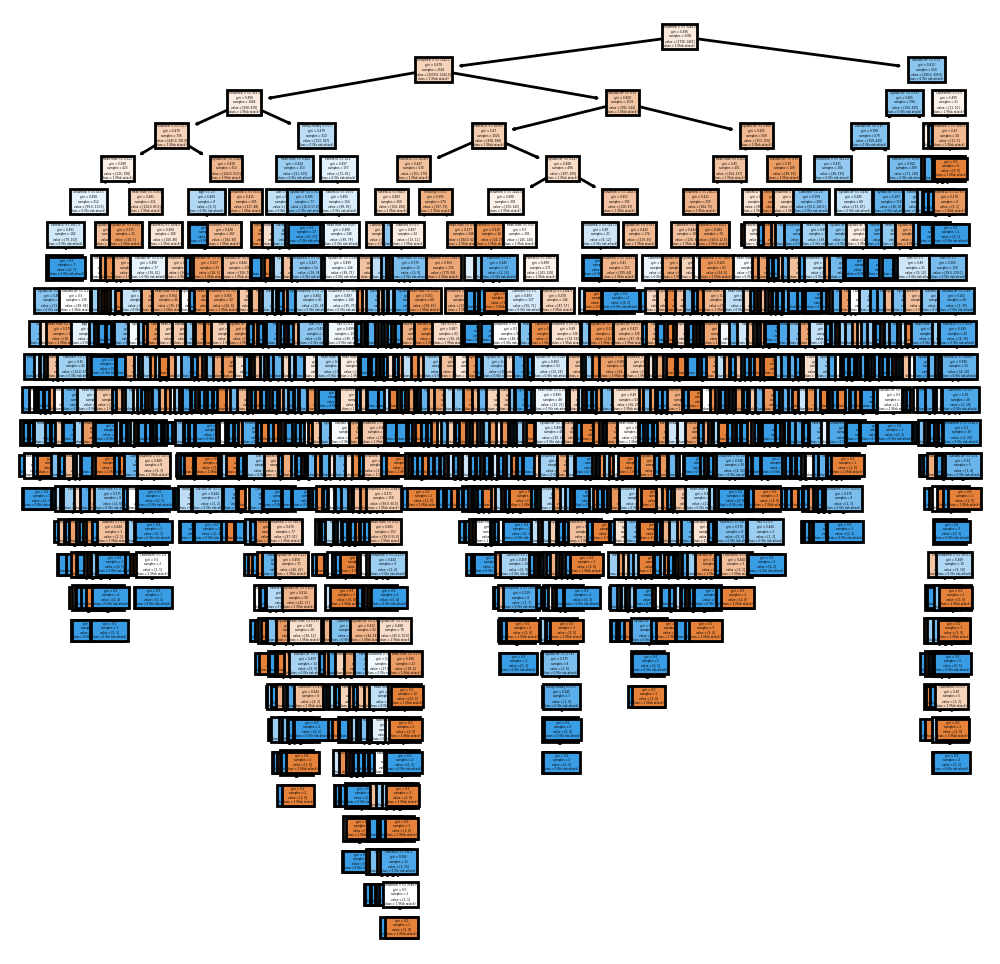

In [57]:
#Decision Tree 

# Plot the decision tree for Gini index
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=200)

class_labels = {1: '1 (Risk attack)', 0: '0 (No risk attack)'}

tree.plot_tree(clf_gini3,
               feature_names=fn,
               class_names=[class_labels[1], class_labels[0]], 
               filled=True
               )

plt.show()

In [83]:
'''
A decision tree is a model used for classification or regression that splits data into subsets based on feature values, forming a tree-like structure.A decision tree is plotted for a classifier trained using the Gini index.The class values 1 and 0 to "Risk attack" and "No risk attack,".
The tree shows how the model classifies data, with each node representing a decision based on a feature.
However, the tree is complex and difficult to read, making it challenging to interpret and use for decision-making.
'''

'\nA decision tree is a model used for classification or regression that splits data into subsets based on feature values, forming a tree-like structure.A decision tree is plotted for a classifier trained using the Gini index.The class values 1 and 0 to "Risk attack" and "No risk attack,".\nThe tree shows how the model classifies data, with each node representing a decision based on a feature.\nHowever, the tree is complex and difficult to read, making it challenging to interpret and use for decision-making.\n'

In [ ]:
# Compute Accuracy
accuracy_gini = metrics.accuracy_score(y_test2, y_pred_gini3)
print("Accuracy:", accuracy_gini)

# Error Rate
error_rate_gini = 1 - accuracy_gini
print("Error Rate:", error_rate_gini)

# Sensitivity (Recall) and Specificity require TN, FP, FN, TP:
TP = cm_gini3[1, 1]
TN = cm_gini3[0, 0]
FP = cm_gini3[0, 1]
FN = cm_gini3[1, 0]

# Sensitivity (Recall)
sensitivity_gini = TP / (TP + FN)
print("Sensitivity:", sensitivity_gini)

# Specificity
specificity_gini = TN / (TN + FP)
print("Specificity:", specificity_gini)

# Precision
precision_gini = TP / (TP + FP)
print("Precision:", precision_gini)

Accuracy: 0.5525
Error Rate: 0.4475
Sensitivity: 0.5217391304347826
Specificity: 0.5819070904645477
Precision: 0.544


In [84]:
'''
These results represent key performance metrics for a classification model:

1-Accuracy (0.5525): The model correctly predicted the outcome 55.25% of the time. This is a moderate level of accuracy, indicating that the model is correct just over half of the time.

2-Error Rate (0.4475): The error rate is the complement of accuracy and shows the proportion of incorrect predictions. Here, 44.75% of the predictions were incorrect, meaning the model makes a significant number of errors.

3-Sensitivity (0.5217): Also known as recall or the true positive rate, sensitivity measures the model's ability to correctly identify positive cases (risk of attack). A sensitivity of 52.17% means the model identifies just over half of the actual positive cases but misses the other half.

4-Specificity (0.5819):or the true negative rate, indicates how well the model identifies negative cases (no risk of attack). A specificity of 58.19% means the model correctly identifies 58.2% of the true negative cases.

5-Precision (0.544): Precision measures the accuracy of the model's positive predictions. With a precision of 54.4%, the model’s positive predictions are correct just over half of the time, meaning it also produces a substantial number of false positives.

Overall Interpretation:
The model shows moderate performance with an accuracy of 55.25%. While its specificity is better than its sensitivity, indicating it is slightly better at identifying negative cases, 
both sensitivity and precision are just above 50%, suggesting it struggles with balancing false positives and false negatives. 
The relatively high error rate (44.75%) suggests that the model could benefit from further improvements to make more accurate predictions.
'''

"\nThese results represent key performance metrics for a classification model:\n\n1-Accuracy (0.5525): The model correctly predicted the outcome 55.25% of the time. This is a moderate level of accuracy, indicating that the model is correct just over half of the time.\n\n2-Error Rate (0.4475): The error rate is the complement of accuracy and shows the proportion of incorrect predictions. Here, 44.75% of the predictions were incorrect, meaning the model makes a significant number of errors.\n\n3-Sensitivity (0.5217): Also known as recall or the true positive rate, sensitivity measures the model's ability to correctly identify positive cases (risk of attack). A sensitivity of 52.17% means the model identifies just over half of the actual positive cases but misses the other half.\n\n4-Specificity (0.5819):or the true negative rate, indicates how well the model identifies negative cases (no risk of attack). A specificity of 58.19% means the model correctly identifies 58.2% of the true negat

In [72]:
#Evaluate The models of Gini Index

In [66]:
import jinja2

data = {
        "Percentages": [
        "Accuracy", "Error Rate", "Sensitivity", "Specificity", "Precision"
    ],

    "70% training, 30% testing": [
        " 0.5266666666666666", "0.4733333333333334", "0.4686411149825784", " 0.5798722044728435", " 0.5056390977443609"
    ],
    "60% training, 40% testing	": [
        "0.555", "0.44499999999999995", " 0.523936170212766", "0.5825471698113207", 
        "0.5267379679144385"    
    ],
    "	80% training, 20% testing": [
        "0.5525", "0.4475", "0.5217391304347826", "0.5819070904645477","0.544"
    ]
}
g = pd.DataFrame(data)
g.style.set_properties(**{'text-align': 'center'})

,Percentages,"70% training, 30% testing","60% training, 40% testing","80% training, 20% testing"
0,Accuracy,0.5266666666666666,0.555,0.5525
1,Error Rate,0.4733333333333334,0.44499999999999995,0.4475
2,Sensitivity,0.4686411149825784,0.523936170212766,0.5217391304347826
3,Specificity,0.5798722044728435,0.5825471698113207,0.5819070904645477
4,Precision,0.5056390977443609,0.5267379679144385,0.544


In [67]:
'''
Using these four metrics, we can determine which model is better suited for making predictions.
Accuracy: Measures the overall correctness of the model by calculating the ratio of correctly predicted observations to the total observations.
Error Rate: Represents the proportion of incorrect predictions made by the model.
Sensitivity (Recall): Reflects the model's ability to correctly identify positive cases (true positives). It focuses on reducing false negatives.
Specificity: Measures the ability of the model to correctly identify negative cases (true negatives). It focuses on reducing false positives.
Precision: Indicates the proportion of positive identifications that were actually correct. It focuses on reducing false positives.
'''

"\nUsing these four metrics, we can determine which model is better suited for making predictions.\nAccuracy: Measures the overall correctness of the model by calculating the ratio of correctly predicted observations to the total observations.\nError Rate: Represents the proportion of incorrect predictions made by the model.\nSensitivity (Recall): Reflects the model's ability to correctly identify positive cases (true positives). It focuses on reducing false negatives.\nSpecificity: Measures the ability of the model to correctly identify negative cases (true negatives). It focuses on reducing false positives.\nPrecision: Indicates the proportion of positive identifications that were actually correct. It focuses on reducing false positives.\n"

In [85]:
''' 
The results show the following model performance across different data splits for training and testing:

Accuracy: The model trained on a 60% training set and 40% testing set achieved the highest accuracy at 0.555 (or 55.5%), followed by the model trained on 80% training and 20% testing with an accuracy of 0.5525 (or 55.25%), and the model trained on 70% training and 30% testing with an accuracy of 0.5267 (or 52.67%).

Error Rate: The model trained on a 70% training set and 30% testing set had the highest error rate at 0.4733 (or 47.33%), followed by the model trained on 80% training and 20% testing with an error rate of 0.4475 (or 44.75%), and the model trained on 60% training and 40% testing with an error rate of 0.445 (or 44.5%).

Sensitivity: The model trained on a 60% training set and 40% testing set achieved the highest sensitivity at 0.5239 (or 52.39%), followed closely by the model trained on 80% training and 20% testing with a sensitivity of 0.5217 (or 52.17%), and the model trained on 70% training and 30% testing with a sensitivity of 0.4686 (or 46.86%).

Specificity: Specificity remained consistent across all splits, with the model trained on 60% training and 40% testing achieving 0.5825 (or 58.25%), followed by 80% training and 20% testing with 0.5819 (or 58.19%), and 70% training and 30% testing with 0.5799 (or 57.99%).

Precision: The model trained on an 80% training set and 20% testing set obtained the highest precision at 0.544 (or 54.4%), followed by the model trained on 60% training and 40% testing with 0.5267 (or 52.67%), and the model trained on 70% training and 30% testing with 0.5056 (or 50.56%).

Analysis:  
Based on these metrics, the *60% training and 40% testing split* appears to be the best choice for the model. 
This split achieves the highest accuracy (55.5%) and sensitivity (52.39%), which are key metrics for assessing overall performance and the ability to correctly identify positive cases.
Furthermore, it has the lowest error rate (44.5%), ensuring fewer incorrect predictions.
While the 80%-20% split performs slightly better in precision, the balance provided by the 60%-40% split across all metrics suggests it is better suited for reliable predictions.
'''

' \nThe results show the following model performance across different data splits for training and testing:\n\nAccuracy: The model trained on a 60% training set and 40% testing set achieved the highest accuracy at 0.555 (or 55.5%), followed by the model trained on 80% training and 20% testing with an accuracy of 0.5525 (or 55.25%), and the model trained on 70% training and 30% testing with an accuracy of 0.5267 (or 52.67%).\n\nError Rate: The model trained on a 70% training set and 30% testing set had the highest error rate at 0.4733 (or 47.33%), followed by the model trained on 80% training and 20% testing with an error rate of 0.4475 (or 44.75%), and the model trained on 60% training and 40% testing with an error rate of 0.445 (or 44.5%).\n\nSensitivity: The model trained on a 60% training set and 40% testing set achieved the highest sensitivity at 0.5239 (or 52.39%), followed closely by the model trained on 80% training and 20% testing with a sensitivity of 0.5217 (or 52.17%), and t